## 2.3 Departments titles

In [123]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [124]:
address = 'C:/Users/Moanesga/Desktop/Data/titles.csv'
titles = pd.read_csv(address)

titles.columns = ['emp_no','title','from_date','to_date']
titles.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [125]:
#transforming time variables into date format
titles['from_date'] = pd.to_datetime(titles['from_date'])
titles['from_date'].max()

Timestamp('2002-08-01 00:00:00')

In [126]:
titles.describe(include='all')

,emp_no,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25 00:00:00,9999-01-01
freq,NaN,115003,132,240124
first,NaN,NaN,1985-01-01 00:00:00,NaN
last,NaN,NaN,2002-08-01 00:00:00,NaN
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN


In [127]:
date = pd.Timestamp('2003-08-01')
titles.iloc[:, 3] = pd.to_datetime(titles.iloc[:, 3], errors='coerce').fillna(date)
titles.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,2003-08-01
1,10002,Staff,1996-08-03,2003-08-01
2,10003,Senior Engineer,1995-12-03,2003-08-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,2003-08-01


In [128]:
titles.describe(include='all')

,emp_no,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25 00:00:00,2003-08-01 00:00:00
freq,NaN,115003,132,240124
first,NaN,NaN,1985-01-01 00:00:00,1985-03-01 00:00:00
last,NaN,NaN,2002-08-01 00:00:00,2003-08-01 00:00:00
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN


In [129]:
titles_freq = titles.filter(['title','emp_no'], axis=1)
titles_freq_1 =titles_freq.groupby(by=['title']).count()
titles_freq_1 

,emp_no
title,
Assistant Engineer,15128
Engineer,115003
Manager,24
Senior Engineer,97750
Senior Staff,92853
Staff,107391
Technique Leader,15159


In [136]:
titles_freq_2 = pd.DataFrame(titles_freq_1,columns =['emp_no'] )
titles_freq_2['total'] = len(titles['emp_no'])
titles_freq_2['percentage'] = (titles_freq_2['emp_no']/titles_freq_2['total'])*100
titles_freq_2.head(5)

,emp_no,total,percentage
title,,,
Assistant Engineer,15128,443308,3.412526
Engineer,115003,443308,25.942009
Manager,24,443308,0.005414
Senior Engineer,97750,443308,22.050132
Senior Staff,92853,443308,20.945483


In [112]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import scipy 
from scipy import stats

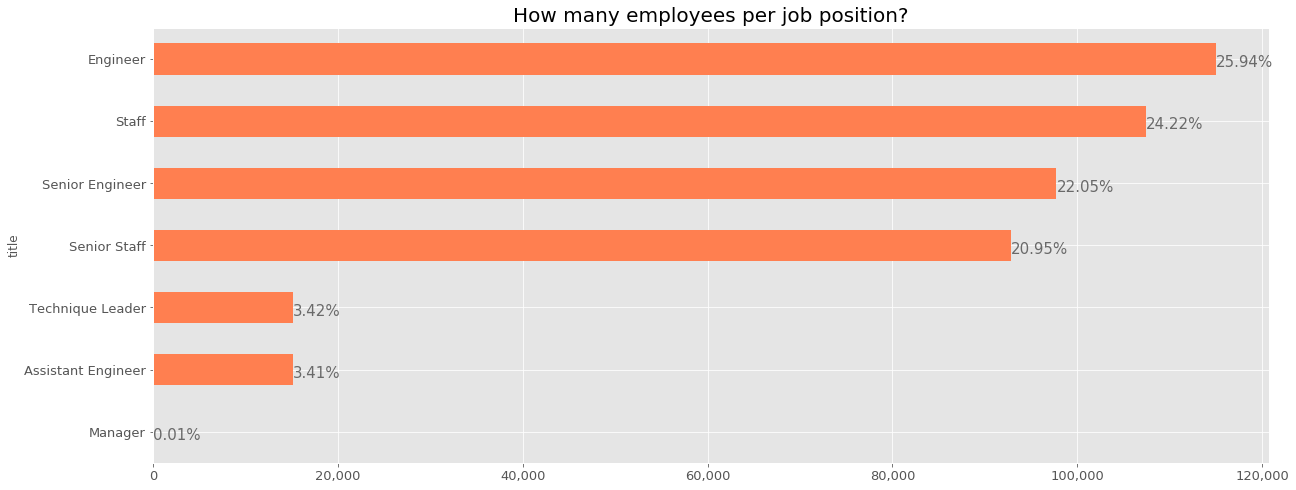

In [151]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20, 8

titles_sorted = titles_freq_2.sort_values('emp_no',ascending=False)
ax = titles_sorted['emp_no'].plot(kind='barh',color = 'coral',fontsize=13)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
for i in ax.patches:

    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
            color='dimgrey')
    
ax.invert_yaxis()

plt.title("How many employees per job position?",fontsize=20, color='black')
plt.show()


In [ ]:
#https://preinventedwheel.com/easy-matplotlib-bar-chart/
#http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html